Load the Iris dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Preprocess the Data

In [ ]:
# Drop unnecessary columns like 'Id' if it exists
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Check for missing or duplicate values
print("Missing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()


Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Duplicate rows: 3


Encode and Scale Features

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode species labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Scale numeric features
scaler = StandardScaler()
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scaler.fit_transform(
    df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
)

df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.915509,1.019971,-1.357737,-1.3357,0
1,-1.157560,-0.128082,-1.357737,-1.3357,0
2,-1.399610,0.331139,-1.414778,-1.3357,0
3,-1.520635,0.101529,-1.300696,-1.3357,0
4,-1.036535,1.249582,-1.357737,-1.3357,0


Saving the preprocesed Data

In [ ]:
df.to_csv("Iris_preprocessed.csv", index=False)

from google.colab import files
files.download("Iris_preprocessed.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**EDA**

In [ ]:
print("\n--- Dataset Information ---")
print(df.info())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
print("\n--- Statistical Summary ---")
print(df.describe())


--- Statistical Summary ---
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


Check class distribution

In [ ]:
print("\n--- Species Distribution ---")
print(df['Species'].value_counts())


--- Species Distribution ---
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


Univariate Analysis - Distribution plots

<Figure size 1000x600 with 0 Axes>

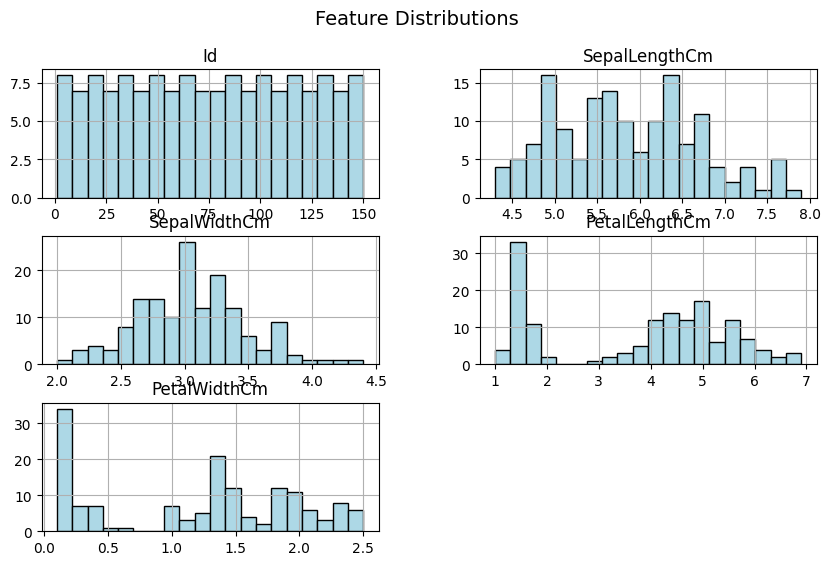

In [ ]:
plt.figure(figsize=(10,6))
df.hist(bins=20, figsize=(10,6), color='lightblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


 Pairplot-Relationship between features

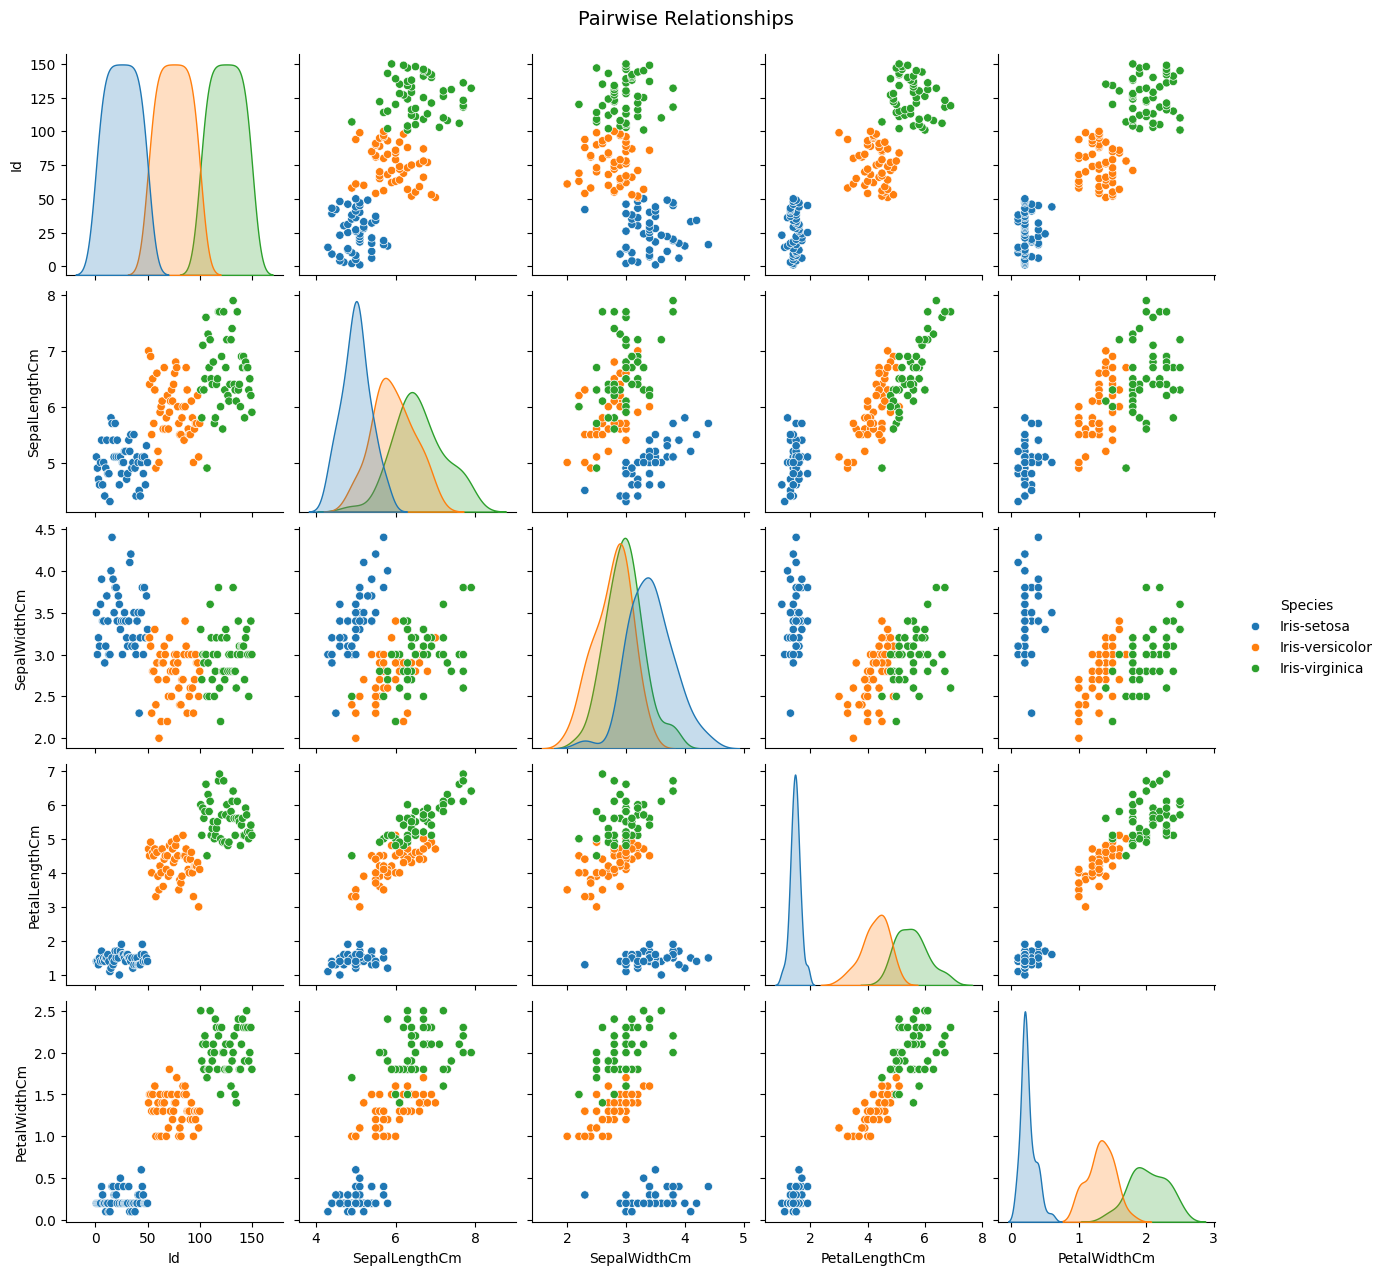

In [ ]:
sns.pairplot(df, hue='Species', diag_kind='kde')
plt.suptitle("Pairwise Relationships", fontsize=14, y=1.02)
plt.show()

 Correlation Heatmap

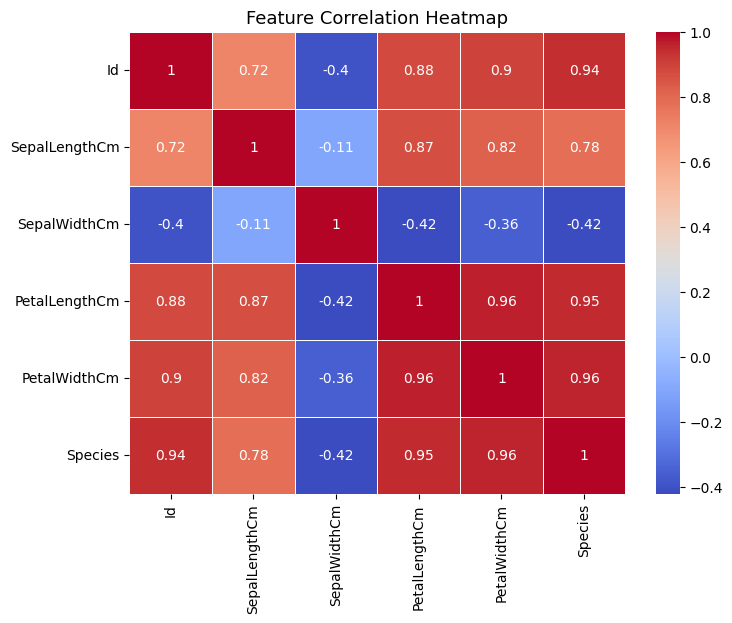

In [ ]:
df['Species'] = df['Species'].astype('category').cat.codes  # Convert text labels to numeric for correlation

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=13)
plt.show()

Boxplots to detect outliers

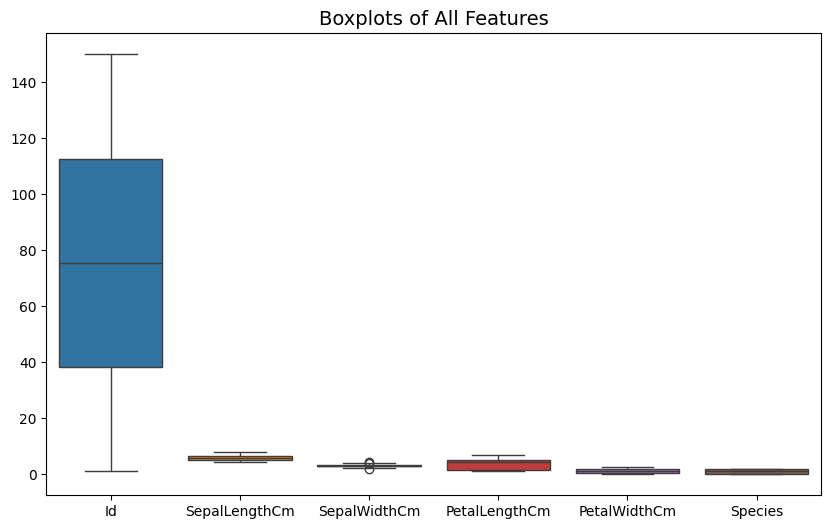

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Boxplots of All Features", fontsize=14)
plt.show()

In [ ]:
print("\n✅ Exploratory Data Analysis Completed Successfully!")


✅ Exploratory Data Analysis Completed Successfully!


Decision Tree

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



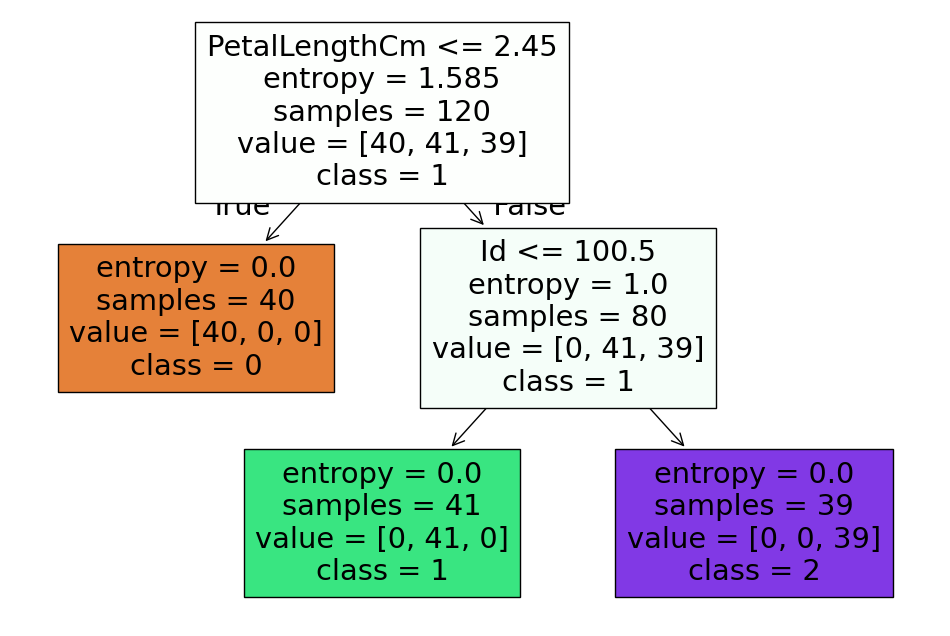

In [ ]:
# AIM: To implement Decision Tree Classifier using Python

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("Iris_preprocessed.csv")

# Features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['0','1','2'])
plt.show()


Naïve Bayes Classification

In [ ]:
# AIM: To implement Naïve Bayes Classifier using Python

from sklearn.naive_bayes import GaussianNB

# Model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Regression Model (Linear Regression Example)

R² Score: 0.9603587427485161
Mean Squared Error: 0.12991981605759947

--- Actual vs Predicted ---
     Actual  Predicted
73      4.7   4.129080
18      1.7   1.877758
118     6.9   7.029104
78      4.5   4.432363
76      4.8   4.929265


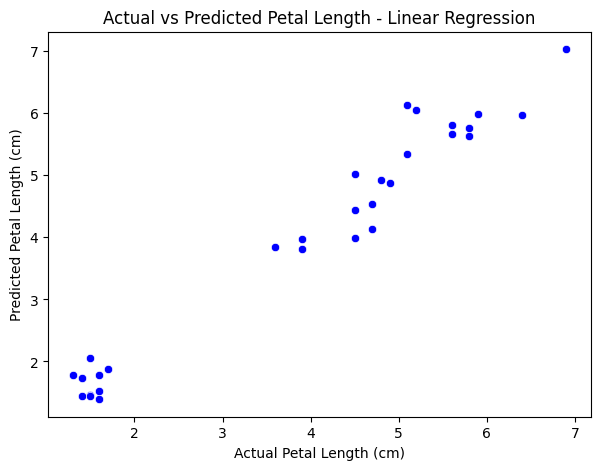

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv("Iris_preprocessed.csv")

# Step 3: Define features (X) and target (y)
# Let's predict PetalLengthCm using other features
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]
y = df['PetalLengthCm']

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)

# Step 8: Compare Actual vs Predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\n--- Actual vs Predicted ---")
print(comparison.head())

# Step 9: Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual Petal Length (cm)")
plt.ylabel("Predicted Petal Length (cm)")
plt.title("Actual vs Predicted Petal Length - Linear Regression")
plt.show()


Clustering — K-Means

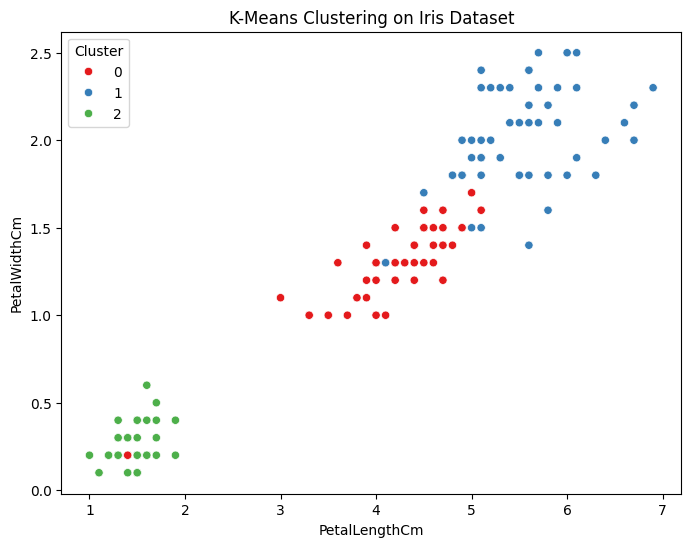

In [ ]:
# AIM: To implement K-Means Clustering using Python

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Use only numeric features
X = df.drop('Species', axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Cluster', data=df, palette='Set1')
plt.title("K-Means Clustering on Iris Dataset")
plt.show()


Clustering — DBSCAN

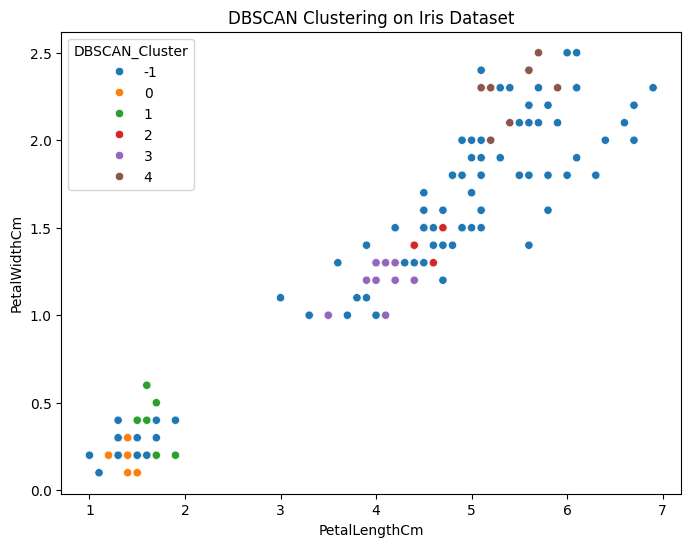

In [ ]:
# AIM: To implement DBSCAN Clustering using Python

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scale data
X_scaled = StandardScaler().fit_transform(X)

# DBSCAN model
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = labels

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='DBSCAN_Cluster', data=df, palette='tab10')
plt.title("DBSCAN Clustering on Iris Dataset")
plt.show()


Clustering — Agglomerative (Hierarchical)

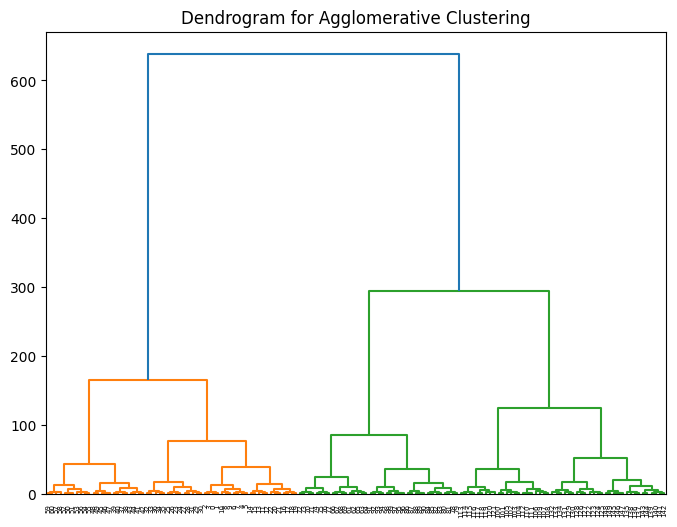

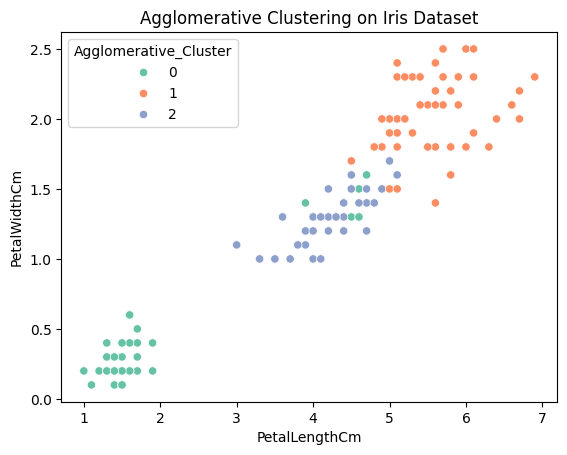

In [ ]:
# AIM: To implement Agglomerative Clustering using Python

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrogram
plt.figure(figsize=(8,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram for Agglomerative Clustering")
plt.show()

# Model
agg = AgglomerativeClustering(n_clusters=3)
df['Agglomerative_Cluster'] = agg.fit_predict(X)

# Plot
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Agglomerative_Cluster', data=df, palette='Set2')
plt.title("Agglomerative Clustering on Iris Dataset")
plt.show()


Association Rule Mining (Apriori Algorithm)